In [1]:
library(dplyr)
library(ggplot2)
library(mlbench)
library(superml)
library(caret)
library(CatEncoders)
library(Information)
library(gridExtra)
library(caTools)
library(gensvm)
library(party)
library(randomForest)
library(rpart.plot)
library(rpart)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: R6

Loading required package: lattice


Attaching package: 'CatEncoders'


The following object is masked from 'package:base':

    transform



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: sandwich


Attaching package: 'party'


The following object is masked from 'package:dplyr':

    where


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixe

In [2]:
data <- read.csv('train.csv')

In [3]:
head(data)

,id,sum,term,payment,guarantees,reason,credits,other_credits,credit_report,marital_status,⋯,qualification,immigrant,residence_since,accommodation,estate,savings,dependents,phone,status,bankruptcy
,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
1,0,1169,6,4,none,television or radio,2,none,critical account or other credits existing(not at this bank),male single,⋯,skilled employee,yes,4,own,real estate,unknown or no savings account,1,yes,less-than 0 cu,0
2,1,5951,48,2,none,television or radio,1,none,existing credits paid back duly till now,female divorced or separated or married,⋯,skilled employee,yes,2,own,real estate,less-than 100 cu,1,none,0 to 200 cu,1
3,2,2096,12,2,none,education,1,none,critical account or other credits existing(not at this bank),male single,⋯,unskilled resident,yes,3,own,real estate,less-than 100 cu,2,none,no checking account,0
4,3,7882,42,2,guarantor,furniture or equipment,1,none,existing credits paid back duly till now,male single,⋯,skilled employee,yes,4,for free,building society savings agreement or life insurance,less-than 100 cu,2,none,less-than 0 cu,0
5,4,4870,24,3,none,new car,2,none,delay in paying off in the past,male single,⋯,skilled employee,yes,4,for free,unknown or no property,less-than 100 cu,2,none,less-than 0 cu,1
6,5,9055,36,2,none,education,1,none,existing credits paid back duly till now,male single,⋯,unskilled resident,yes,4,for free,unknown or no property,unknown or no savings account,2,yes,no checking account,0


In [4]:
dim(data)

[1] 800  22

In [5]:
colnames(data)

[1] "id"              "sum"             "term"            "payment"        
 [5] "guarantees"      "reason"          "credits"         "other_credits"  
 [9] "credit_report"   "marital_status"  "age"             "employment"     
[13] "qualification"   "immigrant"       "residence_since" "accommodation"  
[17] "estate"          "savings"         "dependents"      "phone"          
[21] "status"          "bankruptcy"

In [6]:
data = select(data, -id)

In [7]:
head(data)

,sum,term,payment,guarantees,reason,credits,other_credits,credit_report,marital_status,age,⋯,qualification,immigrant,residence_since,accommodation,estate,savings,dependents,phone,status,bankruptcy
,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,⋯,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
1,1169,6,4,none,television or radio,2,none,critical account or other credits existing(not at this bank),male single,67,⋯,skilled employee,yes,4,own,real estate,unknown or no savings account,1,yes,less-than 0 cu,0
2,5951,48,2,none,television or radio,1,none,existing credits paid back duly till now,female divorced or separated or married,22,⋯,skilled employee,yes,2,own,real estate,less-than 100 cu,1,none,0 to 200 cu,1
3,2096,12,2,none,education,1,none,critical account or other credits existing(not at this bank),male single,49,⋯,unskilled resident,yes,3,own,real estate,less-than 100 cu,2,none,no checking account,0
4,7882,42,2,guarantor,furniture or equipment,1,none,existing credits paid back duly till now,male single,45,⋯,skilled employee,yes,4,for free,building society savings agreement or life insurance,less-than 100 cu,2,none,less-than 0 cu,0
5,4870,24,3,none,new car,2,none,delay in paying off in the past,male single,53,⋯,skilled employee,yes,4,for free,unknown or no property,less-than 100 cu,2,none,less-than 0 cu,1
6,9055,36,2,none,education,1,none,existing credits paid back duly till now,male single,35,⋯,unskilled resident,yes,4,for free,unknown or no property,unknown or no savings account,2,yes,no checking account,0


In [8]:
str(data)

'data.frame':	800 obs. of  21 variables:
 $ sum            : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ term           : int  6 48 12 42 24 36 24 36 12 30 ...
 $ payment        : int  4 2 2 2 3 2 3 2 2 4 ...
 $ guarantees     : chr  "none" "none" "none" "guarantor" ...
 $ reason         : chr  "television or radio" "television or radio" "education" "furniture or equipment" ...
 $ credits        : int  2 1 1 1 2 1 1 1 1 2 ...
 $ other_credits  : chr  "none" "none" "none" "none" ...
 $ credit_report  : chr  "critical account or other credits existing(not at this bank)" "existing credits paid back duly till now" "critical account or other credits existing(not at this bank)" "existing credits paid back duly till now" ...
 $ marital_status : chr  "male single" "female divorced or separated or married" "male single" "male single" ...
 $ age            : int  67 22 49 45 53 35 53 35 61 28 ...
 $ employment     : chr  "7+ y." "1 to 4 y." "4 to 7 y." "4 to 7 y." ...
 $ qualif

In [9]:
summary(data)

      sum             term          payment       guarantees       
 Min.   :  250   Min.   : 4.00   Min.   :1.000   Length:800        
 1st Qu.: 1342   1st Qu.:12.00   1st Qu.:2.000   Class :character  
 Median : 2282   Median :18.00   Median :3.000   Mode  :character  
 Mean   : 3191   Mean   :20.65   Mean   :2.966                     
 3rd Qu.: 3914   3rd Qu.:24.00   3rd Qu.:4.000                     
 Max.   :15945   Max.   :72.00   Max.   :4.000                     
    reason             credits      other_credits      credit_report     
 Length:800         Min.   :1.000   Length:800         Length:800        
 Class :character   1st Qu.:1.000   Class :character   Class :character  
 Mode  :character   Median :1.000   Mode  :character   Mode  :character  
                    Mean   :1.396                                        
                    3rd Qu.:2.000                                        
                    Max.   :4.000                                        
 marit

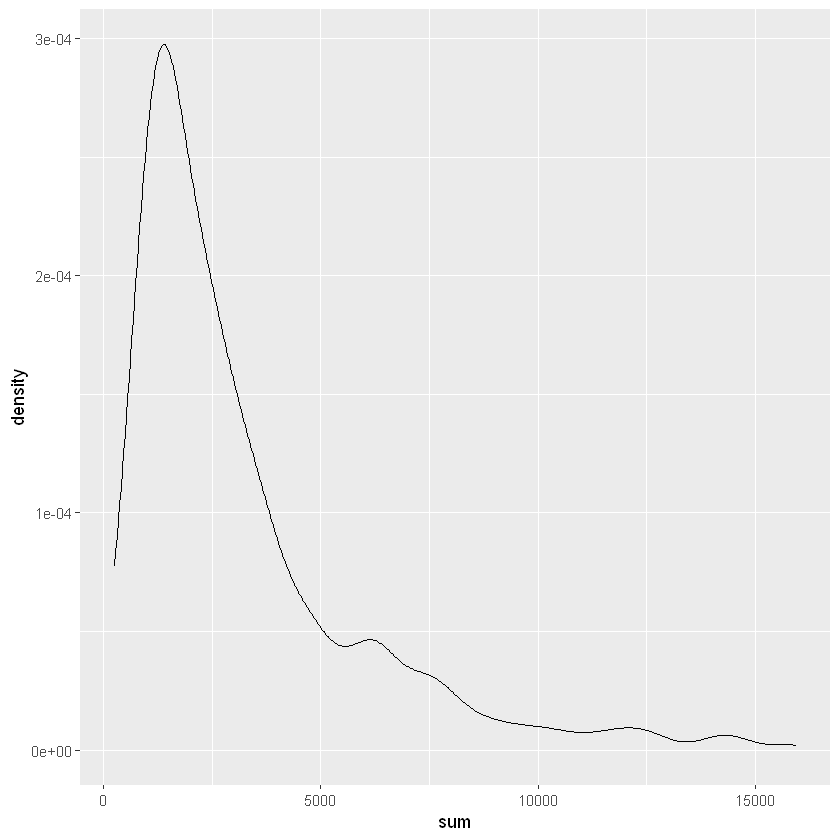

In [10]:
ggplot(data, aes(x=sum)) + geom_density(alpha=.3)

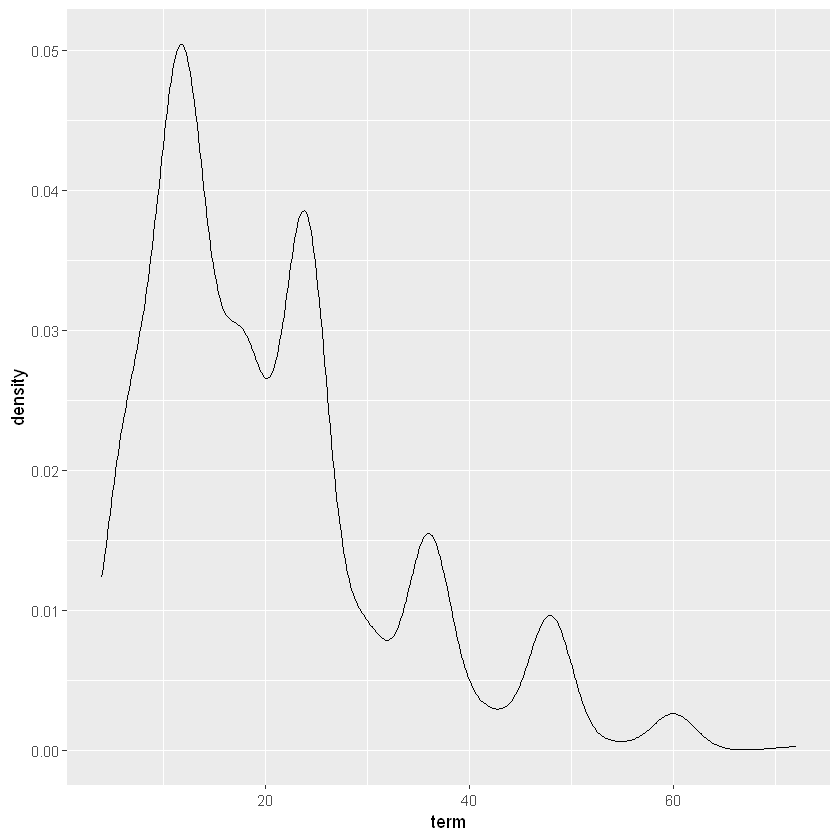

In [11]:
ggplot(data, aes(x=term)) + geom_density(alpha=.3)

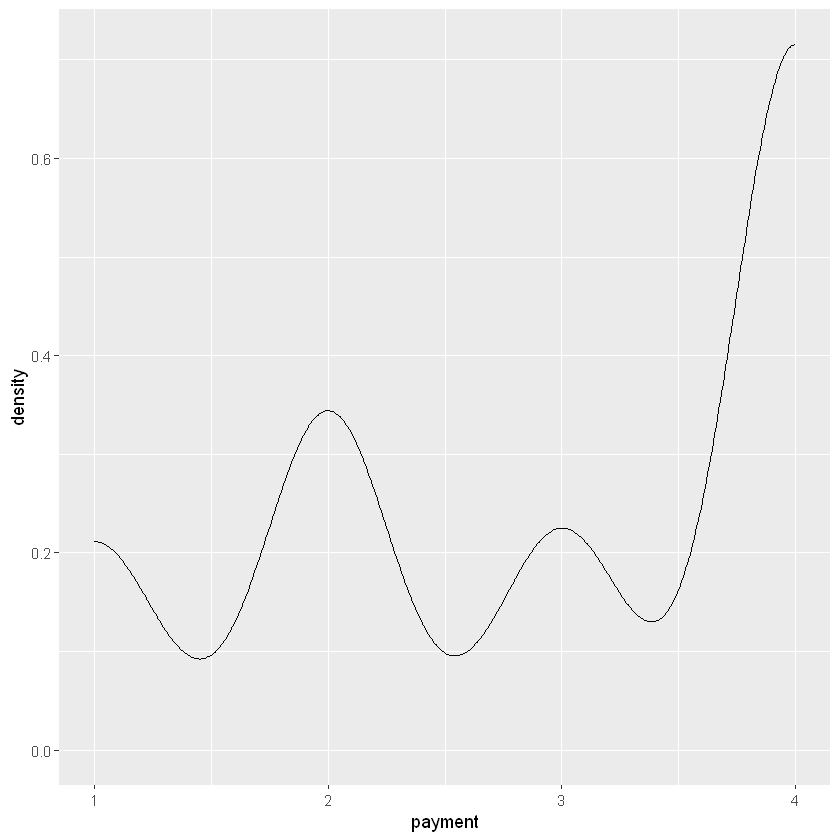

In [12]:
ggplot(data, aes(x = payment)) + geom_density(alpha=.3)

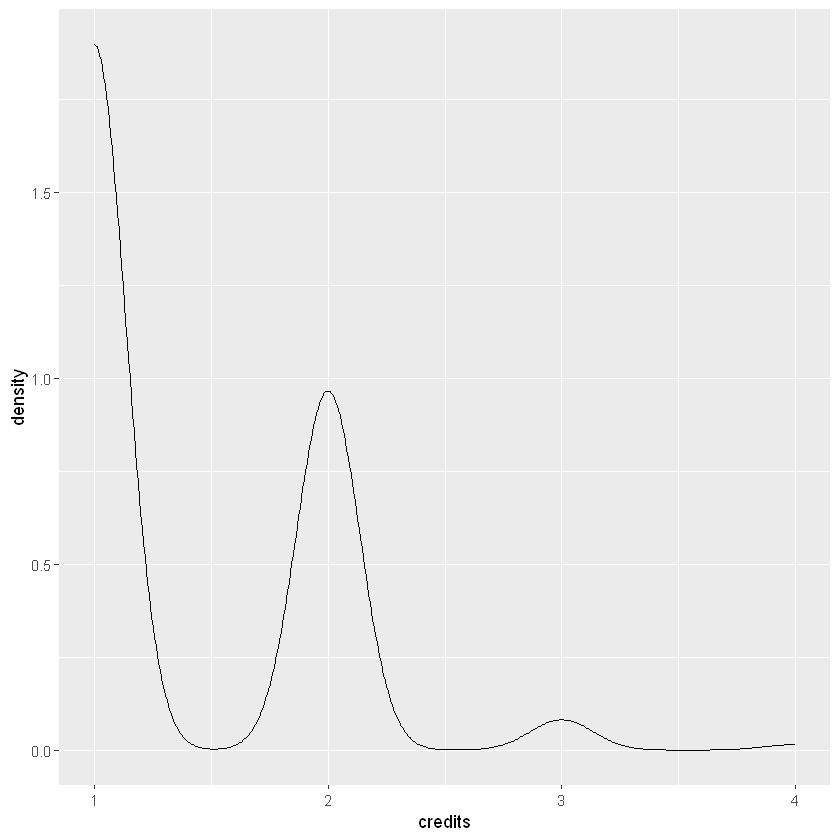

In [13]:
ggplot(data, aes(x=credits)) + geom_density(alpha=.3)

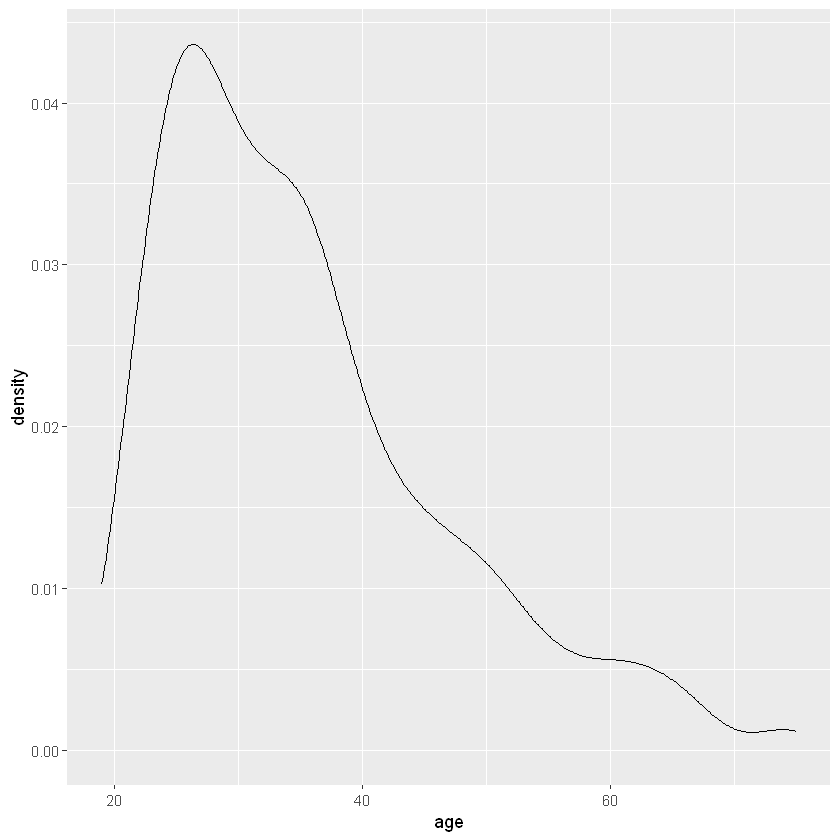

In [14]:
ggplot(data, aes(x=age)) + geom_density(alpha=.3)

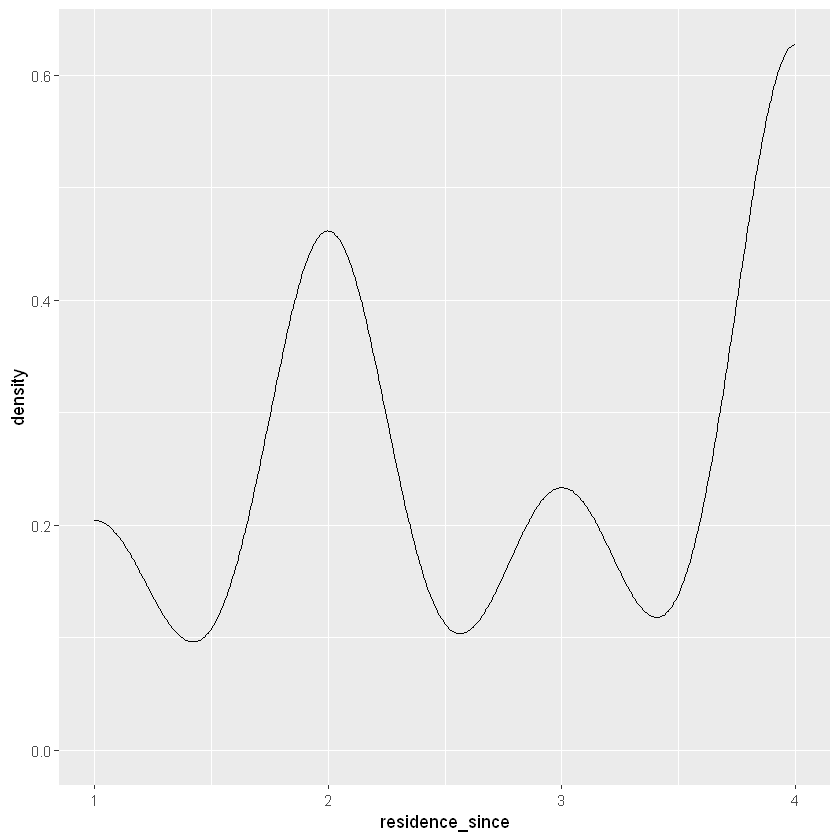

In [15]:
ggplot(data, aes(x=residence_since)) + geom_density(alpha=.3)

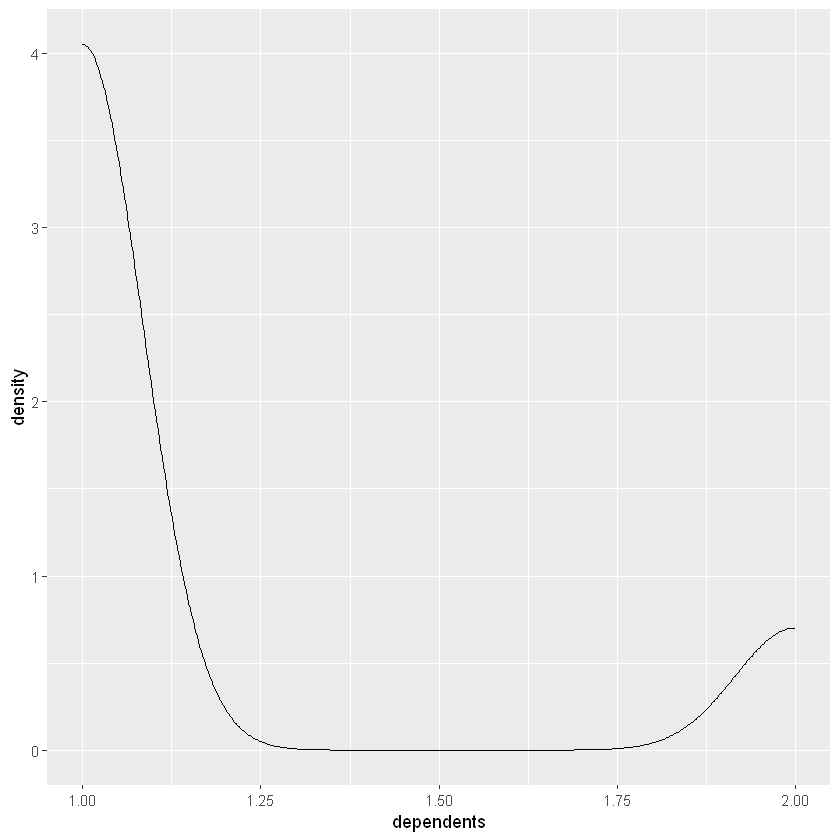

In [16]:
ggplot(data, aes(x=dependents)) + geom_density(alpha=.3)

In [17]:
data$bankruptcy[data$bankruptcy == 1] <- "Bankrupt"
data$bankruptcy[data$bankruptcy == 0] <- "No Bankrupt"

In [18]:
count(data, bankruptcy)

bankruptcy,n
<chr>,<int>
Bankrupt,239
No Bankrupt,561


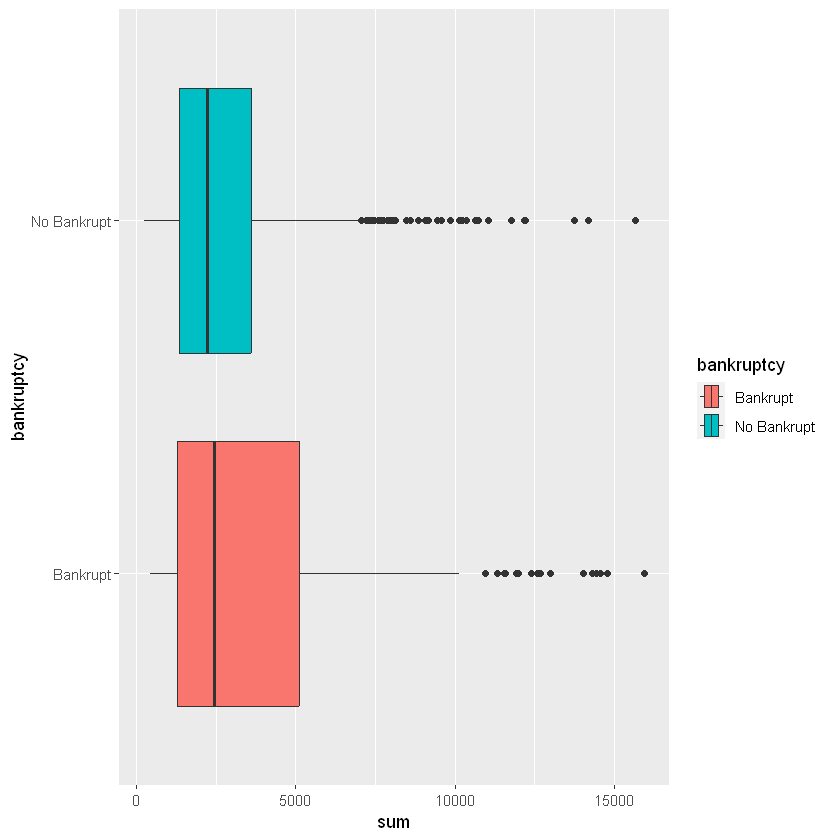

In [19]:
ggplot(data, aes(x=sum, y=bankruptcy, fill=bankruptcy)) + geom_boxplot()

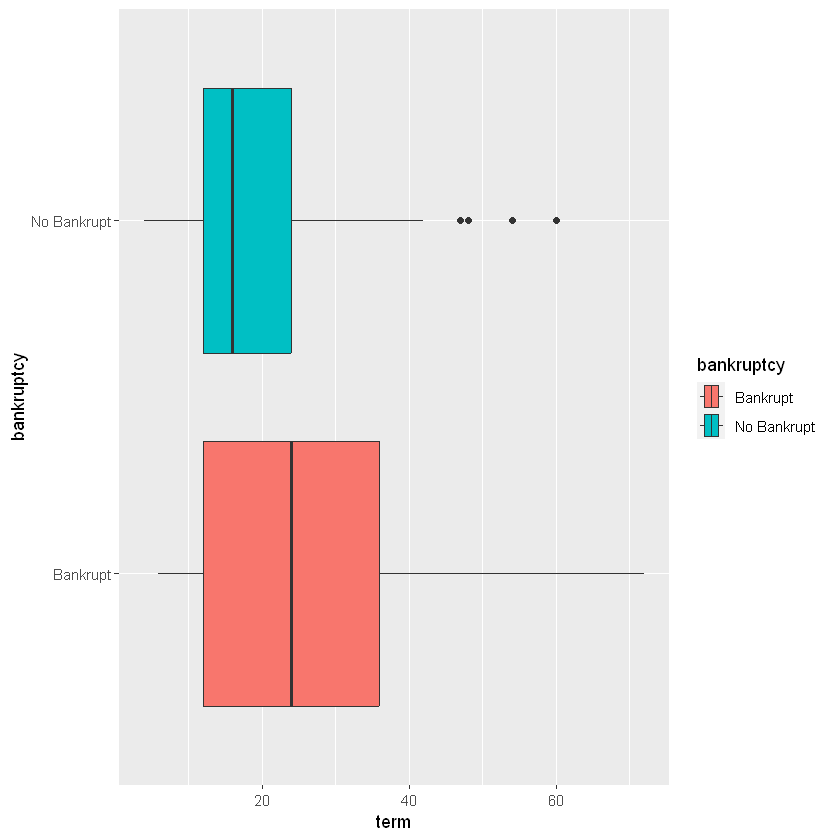

In [20]:
ggplot(data, aes(x=term, y=bankruptcy, fill=bankruptcy)) + geom_boxplot()

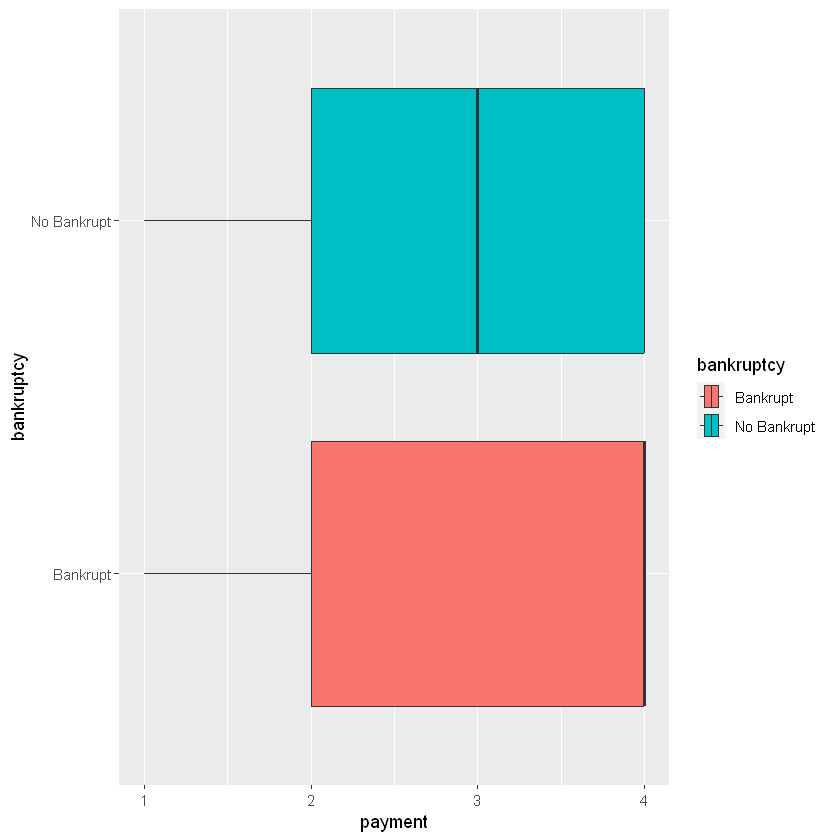

In [21]:
ggplot(data, aes(x=payment, y=bankruptcy, fill=bankruptcy)) + geom_boxplot()

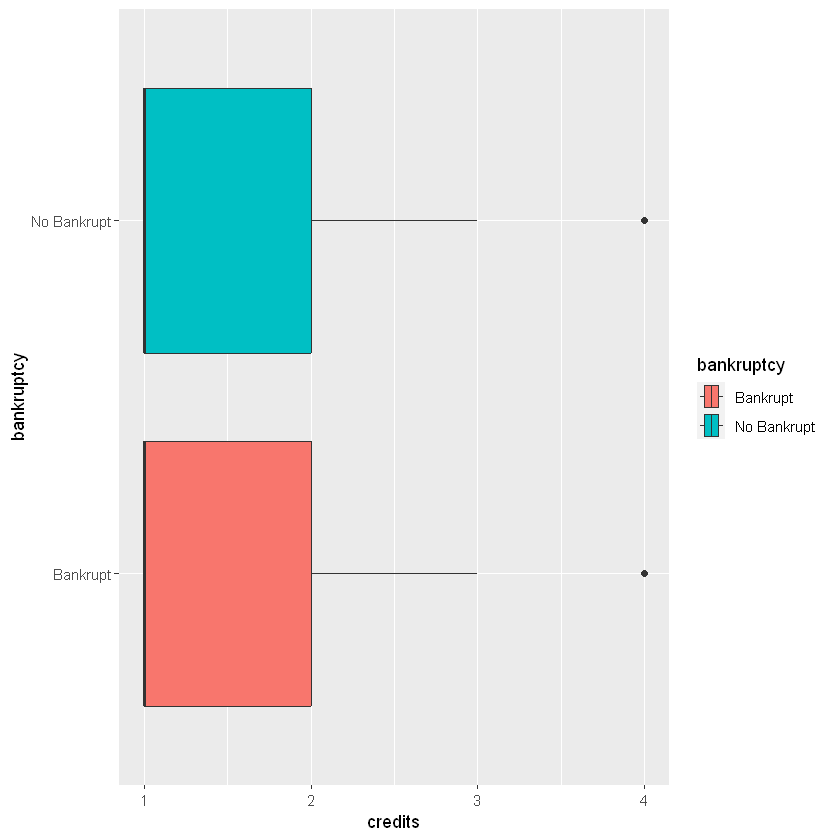

In [22]:
ggplot(data, aes(x=credits, y=bankruptcy, fill=bankruptcy)) + geom_boxplot()

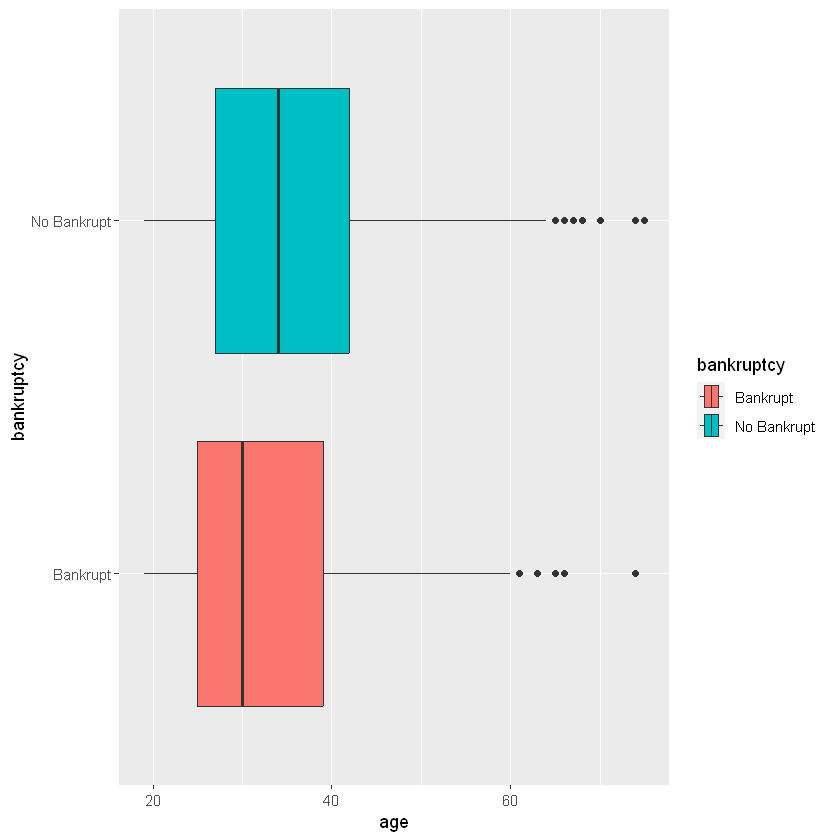

In [23]:
ggplot(data, aes(x=age, y=bankruptcy, fill=bankruptcy)) + geom_boxplot()

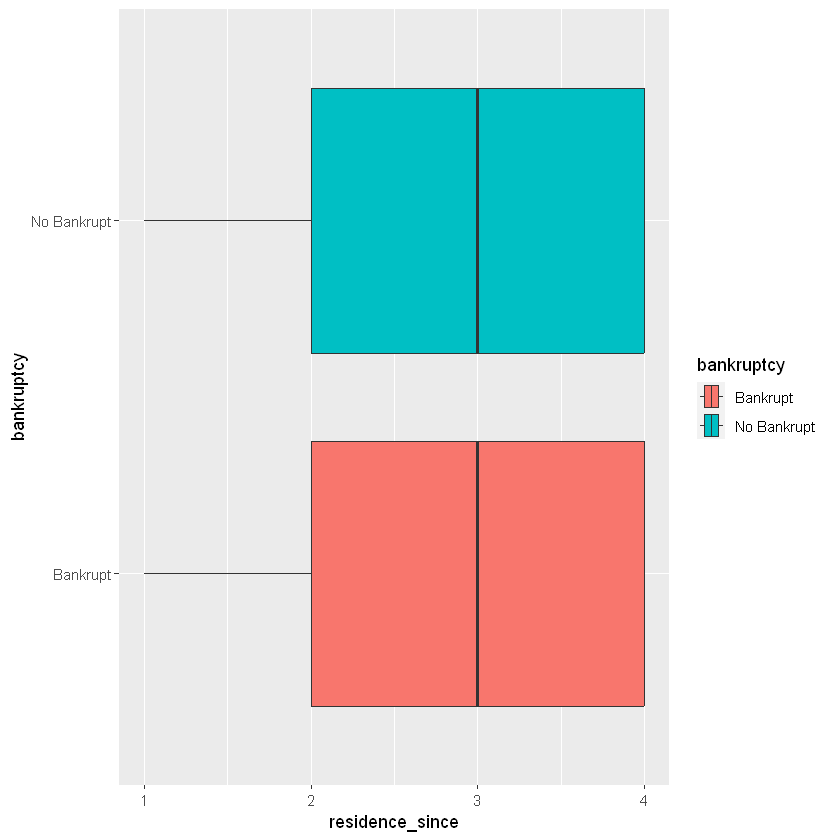

In [24]:
ggplot(data, aes(x=residence_since, y=bankruptcy, fill=bankruptcy)) + geom_boxplot()

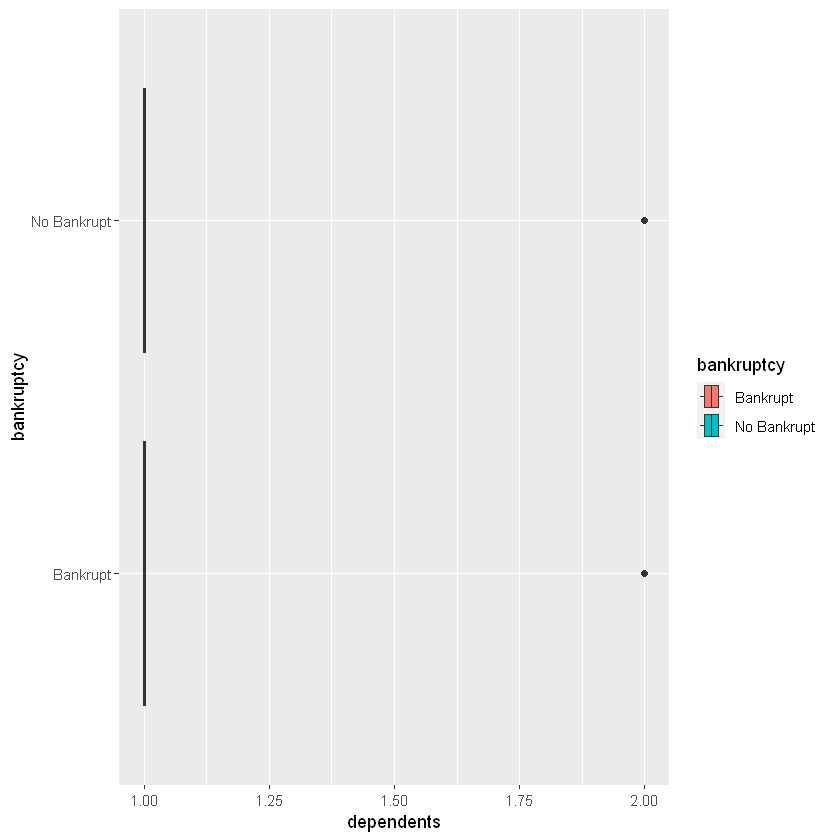

In [25]:
ggplot(data, aes(x=dependents, y=bankruptcy, fill=bankruptcy)) + geom_boxplot()

In [26]:
colnames(data)

[1] "sum"             "term"            "payment"         "guarantees"     
 [5] "reason"          "credits"         "other_credits"   "credit_report"  
 [9] "marital_status"  "age"             "employment"      "qualification"  
[13] "immigrant"       "residence_since" "accommodation"   "estate"         
[17] "savings"         "dependents"      "phone"           "status"         
[21] "bankruptcy"

In [27]:
table(data$bankruptcy)


   Bankrupt No Bankrupt 
        239         561 

In [28]:
table(data$guarantees, data$bankruptcy)

              
               Bankrupt No Bankrupt
  co-applicant       14          16
  guarantor           8          34
  none              217         511

In [29]:
table(data$guarantees, data$reason)

              
               business education furniture or equipment household appliances
  co-applicant        1         0                      8                    0
  guarantor           2         0                      6                    0
  none               74        45                    130                    9
              
               new car other repairs requalification television or radio
  co-applicant       8     3       1               0                   9
  guarantor          7     1       1               0                  23
  none             169     6      17               8                 191
              
               used car
  co-applicant        0
  guarantor           2
  none               79

In [30]:
table(data$other_credits, data$bankruptcy)

        
         Bankrupt No Bankrupt
  bank         43          69
  none        181         472
  stores       15          20

In [31]:
table(data$credit_report, data$bankruptcy)

                                                              
                                                               Bankrupt
  all credits at this bank paid back duly                            21
  critical account or other credits existing(not at this bank)       43
  delay in paying off in the past                                    24
  existing credits paid back duly till now                          131
  no credits or all paid                                             20
                                                              
                                                               No Bankrupt
  all credits at this bank paid back duly                               16
  critical account or other credits existing(not at this bank)         192
  delay in paying off in the past                                       47
  existing credits paid back duly till now                             293
  no credits or all paid                                           

In [32]:
table(data$marital_status, data$bankruptcy)

                                         
                                          Bankrupt No Bankrupt
  female divorced or separated or married       93         162
  male divorced or separated                    17          21
  male married or widowed                       20          50
  male single                                  109         328

In [33]:
table(data$employment, data$bankruptcy)

                
                 Bankrupt No Bankrupt
  1 to 4 y.            84         191
  4 to 7 y.            30         111
  7+ y.                52         151
  less-than 1 y.       54          79
  unemployed           19          29

In [34]:
table(data$qualification, data$bankruptcy)

                                                          
                                                           Bankrupt No Bankrupt
  management or self-employed or highly qualified employee       44          75
  skilled employee                                              144         359
  unemployed or unskilled non-resident                            5          12
  unskilled resident                                             46         115

In [35]:
table(data$immigrant, data$bankruptcy)

     
      Bankrupt No Bankrupt
  no         2          25
  yes      237         536

In [36]:
table(data$accommodation, data$bankruptcy)

          
           Bankrupt No Bankrupt
  for free       36          54
  own           149         421
  rent           54          86

In [37]:
table(data$estate, data$bankruptcy)

                                                      
                                                       Bankrupt No Bankrupt
  building society savings agreement or life insurance       54         123
  car or other                                               79         187
  real estate                                                51         178
  unknown or no property                                     55          73

In [38]:
table(data$savings, data$bankruptcy)

                               
                                Bankrupt No Bankrupt
  100 to 500 cu                       30          59
  500 to 1000 cu                       7          44
  greater-than 1000 cu                 6          36
  less-than 100 cu                   166         310
  unknown or no savings account       30         112

In [39]:
table(data$phone, data$bankruptcy)

      
       Bankrupt No Bankrupt
  none      151         330
  yes        88         231

In [40]:
table(data$status, data$bankruptcy)

                                                               
                                                                Bankrupt
  0 to 200 cu                                                         93
  greater-than 200 cu or salary assignments for at least 1 year       12
  less-than 0 cu                                                      99
  no checking account                                                 35
                                                               
                                                                No Bankrupt
  0 to 200 cu                                                           133
  greater-than 200 cu or salary assignments for at least 1 year          43
  less-than 0 cu                                                        110
  no checking account                                                   275

In [41]:
data$bankruptcy[data$bankruptcy == "Bankrupt"] <- 1
data$bankruptcy[data$bankruptcy == "No Bankrupt"] <- 0

In [42]:
data$bankruptcy=as.numeric(as.character(data$bankruptcy))

In [43]:
iv = create_infotables(data = data, y = "bankruptcy")

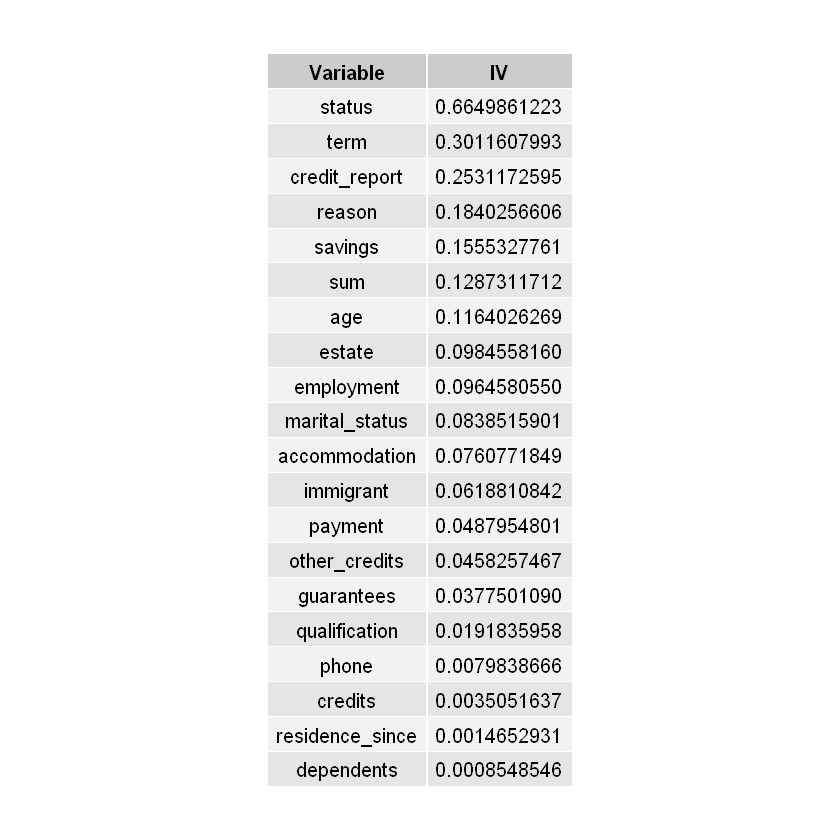

In [44]:
grid.table((iv$Summary), rows=NULL)

In [45]:
data = data %>% select(c('term','credit_report','reason','savings','sum','age','estate','bankruptcy'))

In [46]:
data$bankruptcy=as.character(as.numeric(data$bankruptcy))

In [47]:
head(data)

,term,credit_report,reason,savings,sum,age,estate,bankruptcy
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,6,critical account or other credits existing(not at this bank),television or radio,unknown or no savings account,1169,67,real estate,0
2,48,existing credits paid back duly till now,television or radio,less-than 100 cu,5951,22,real estate,1
3,12,critical account or other credits existing(not at this bank),education,less-than 100 cu,2096,49,real estate,0
4,42,existing credits paid back duly till now,furniture or equipment,less-than 100 cu,7882,45,building society savings agreement or life insurance,0
5,24,delay in paying off in the past,new car,less-than 100 cu,4870,53,unknown or no property,1
6,36,existing credits paid back duly till now,education,unknown or no savings account,9055,35,unknown or no property,0


In [48]:
data$credit_report <- as.numeric(factor(data$credit_report))

In [49]:
data$reason <- as.numeric(factor(data$reason))

In [50]:
data$savings <- as.numeric(factor(data$savings))

In [51]:
data$estate <- as.numeric(factor(data$estate))

In [52]:
head(data)

,term,credit_report,reason,savings,sum,age,estate,bankruptcy
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>
1,6,2,9,5,1169,67,3,0
2,48,4,9,4,5951,22,3,1
3,12,2,2,4,2096,49,3,0
4,42,4,3,4,7882,45,1,0
5,24,3,5,4,4870,53,4,1
6,36,4,2,5,9055,35,4,0


In [53]:
sample_data = sample.split(data, SplitRatio = 0.8)
train_data <- subset(data, sample_data == TRUE)
test_data <- subset(data, sample_data == FALSE)

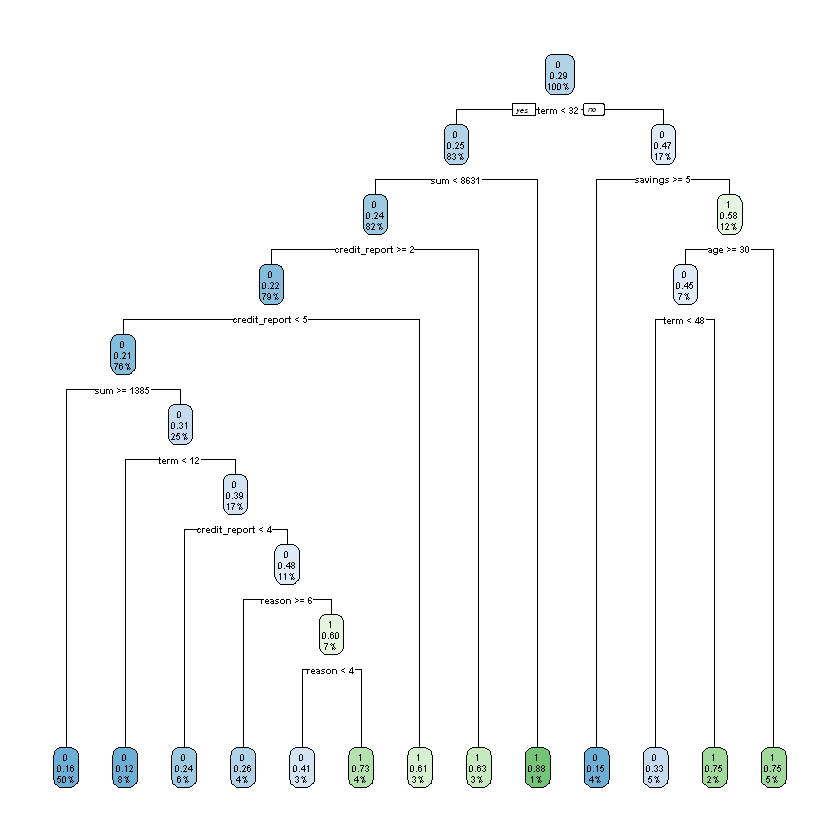

In [54]:
rtree <- rpart( bankruptcy~ ., train_data, method = "class")
rpart.plot(rtree)

In [55]:
predict_model<-predict(rtree, test_data,type="class")

In [56]:
cm <- as.matrix(table(test_data$bankruptcy, predict_model))
cm

   predict_model
      0   1
  0 119  14
  1  41  26

In [57]:
n = sum(cm) # number of instances
nc = nrow(cm) # number of classes
diag = diag(cm) # number of correctly classified instances per class 
rowsums = apply(cm, 1, sum) # number of instances per class
colsums = apply(cm, 2, sum) # number of predictions per class
p = rowsums / n # distribution of instances over the actual classes
q = colsums / n # distribution of instances over the predicted

In [58]:
accuracy = sum(diag) / n
accuracy

[1] 0.725

In [59]:
precision = diag / colsums 
recall = diag / rowsums 
f1 = 2 * precision * recall / (precision + recall) 

In [60]:
data.frame(accuracy, precision, recall, f1) 

,accuracy,precision,recall,f1
,<dbl>,<dbl>,<dbl>,<dbl>
0,0.725,0.74375,0.8947368,0.8122867
1,0.725,0.65000,0.3880597,0.4859813


In [61]:
macroPrecision = mean(precision)
macroRecall = mean(recall)
macroF1 = mean(f1)

In [62]:
data.frame(accuracy,macroPrecision, macroRecall, macroF1)

accuracy,macroPrecision,macroRecall,macroF1
<dbl>,<dbl>,<dbl>,<dbl>
0.725,0.696875,0.6413983,0.649134


In [65]:
Model<-randomForest(as.factor(bankruptcy)~.,data=train_data,ntree=1000,proximity=TRUE)  
Model 
# table(predict(iris_rf), trainData$Species)


Call:
 randomForest(formula = as.factor(bankruptcy) ~ ., data = train_data,      ntree = 1000, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 27.33%
Confusion matrix:
    0  1 class.error
0 386 42  0.09813084
1 122 50  0.70930233

In [67]:
predict_model<-predict(Model, test_data,type="class")

In [68]:
cm <- as.matrix(table(test_data$bankruptcy, predict_model))
cm

   predict_model
      0   1
  0 116  17
  1  45  22

In [69]:
n = sum(cm) # number of instances
nc = nrow(cm) # number of classes
diag = diag(cm) # number of correctly classified instances per class 
rowsums = apply(cm, 1, sum) # number of instances per class
colsums = apply(cm, 2, sum) # number of predictions per class
p = rowsums / n # distribution of instances over the actual classes
q = colsums / n # distribution of instances over the predicted

In [70]:
accuracy = sum(diag) / n
accuracy

[1] 0.69

In [71]:
precision = diag / colsums 
recall = diag / rowsums 
f1 = 2 * precision * recall / (precision + recall) 

In [72]:
data.frame(accuracy, precision, recall, f1) 

,accuracy,precision,recall,f1
,<dbl>,<dbl>,<dbl>,<dbl>
0,0.69,0.7204969,0.8721805,0.7891156
1,0.69,0.5641026,0.3283582,0.4150943


In [73]:
macroPrecision = mean(precision)
macroRecall = mean(recall)
macroF1 = mean(f1)

In [74]:
data.frame(accuracy,macroPrecision, macroRecall, macroF1)

accuracy,macroPrecision,macroRecall,macroF1
<dbl>,<dbl>,<dbl>,<dbl>
0.69,0.6422997,0.6002693,0.602105
